In [2]:
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.9/29.9 MB 10.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [4]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 12.0 MB/s eta 0:00:0000:0100:01
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=e6a45e480e8befa449857545c5e32012120c3cacc8813704c8dea07b87bd6549
  Stored in directory: /Users/ben/Library/Caches/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [6]:
! pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 3.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [16]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
import seaborn as sns
df = pd.read_csv('/Users/ben/Desktop/DISSERTATION/github/dissertation2022/FINALCSV08082022.csv')
df.columns.tolist()
df.groupby(['category'])['category'].count()


category
CRIME            24
ENTERTAINMENT    25
POLITICS         25
SPORTS           25
WOMEN            25
Name: category, dtype: int64

In [23]:
%matplotlib notebook

<IPython.core.display.Javascript object>


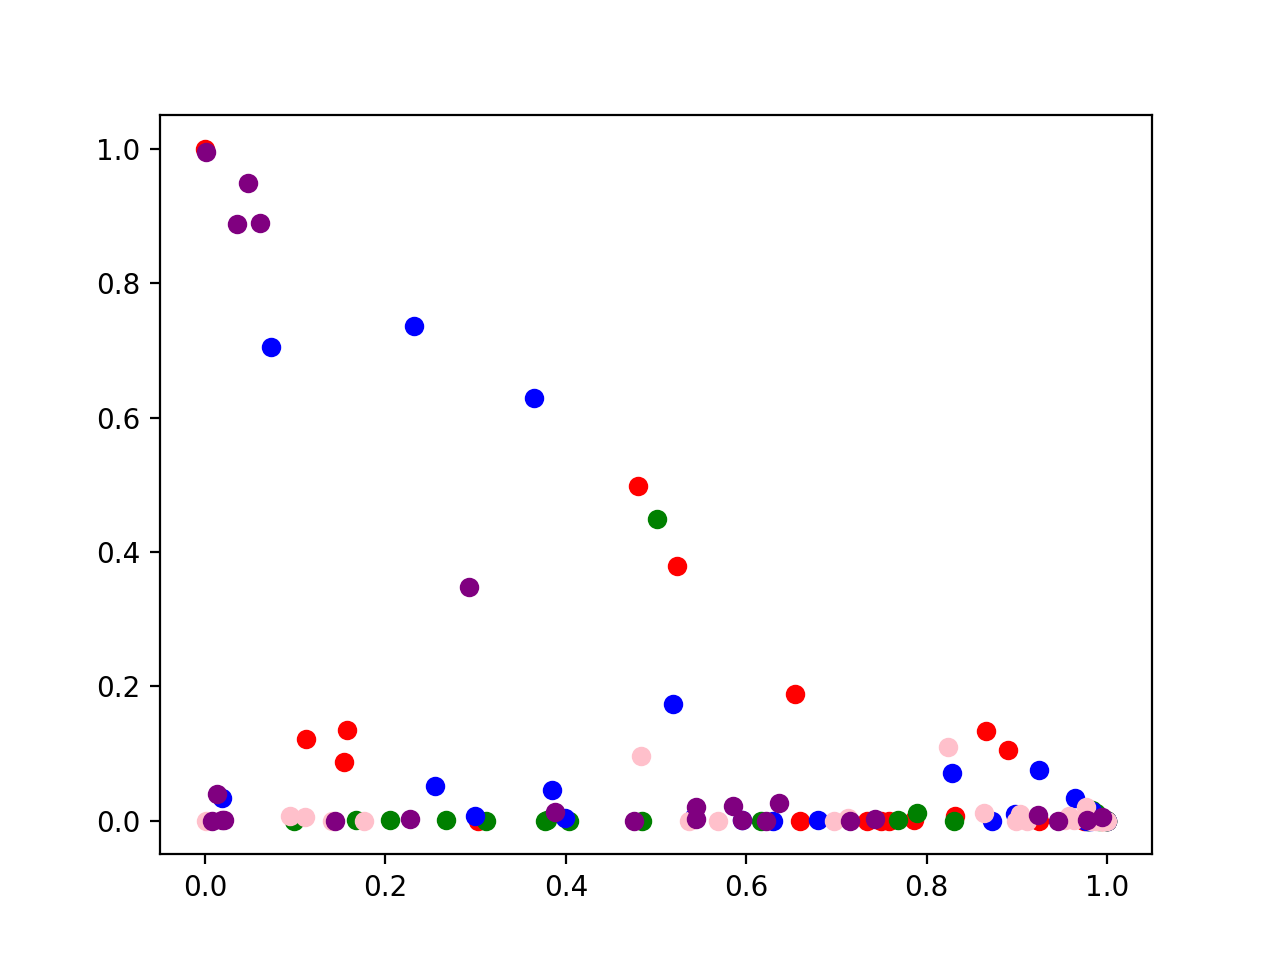

3.5292620332721736


In [38]:
figure, ax = plt.subplots()


from sklearn.preprocessing import MinMaxScaler 
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['Headline','Short_descr', 'Image_Caption(s)','OFACAPTION']]) 
print(km.inertia_) 
#sse.append(km.inertia_) df['alloftheabove'] = y_predicted
df1 = y_predicted[y_predicted['category']=='CRIME'] 
df2 = df[df['category']=='ENTERTAINMENT'] 
df3 = df[df['category']=='POLITICS'] 
df4 = df[df['category']=='SPORTS'] 
df5 = df[df['category']=='WOMEN']
# ax = plt.axes(projection='3d')

# ax.scatter3D(df1['Headline'], df1['Image_Caption(s)'], df1['OFACAPTION'], cmap='Red')
# ax.scatter3D(df2['Headline'], df2['Image_Caption(s)'], df2['OFACAPTION'], cmap='Green')
# ax.scatter3D(df3['Headline'], df3['Image_Caption(s)'], df3['OFACAPTION'], cmap='Blue')
# ax.scatter3D(df4['Headline'], df4['Image_Caption(s)'], df4['OFACAPTION'], cmap='Pink')
# ax.scatter3D(df5['Headline'], df5['Image_Caption(s)'], df5['OFACAPTION'], cmap='Purple')

# ax.set_xlabel('Headline CLIP score')
# ax.set_ylabel('Image Caption CLIP score')
# ax.set_zlabel('OFA caption CLIP score')
#plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
#plt.xlabel('gmean')
#plt.ylabel('mean')
# plt.show()

ax.scatter(df1['Image_Caption(s)'], df1['OFACAPTION'], color='Red')
ax.scatter(df2['Image_Caption(s)'], df2['OFACAPTION'], color='Green')
ax.scatter(df3['Image_Caption(s)'], df3['OFACAPTION'], color='Blue')
ax.scatter(df4['Image_Caption(s)'], df4['OFACAPTION'], color='Pink')
ax.scatter(df5['Image_Caption(s)'], df5['OFACAPTION'], color='Purple')
plt.show()
#this is for saving the image as a high resolution svg file. Again, nothing would have been possible
# without StackOverflow figure.savefig('C:/Users/ben/Desktop/images/svg/3dpicturesentropy.svg', format='svg', dpi=1200)

In [66]:
import re
print(df['headlineandOFA'][0])
splittedup = re.split('\'',df['headlineandOFA'][0])
relation = splittedup[1]
score = re.split(' ', splittedup[3])
print(relation)
print(score[1])

('contradiction', ' 0.78%')
contradiction
0.78%


3.684825625789707


<IPython.core.display.Javascript object>


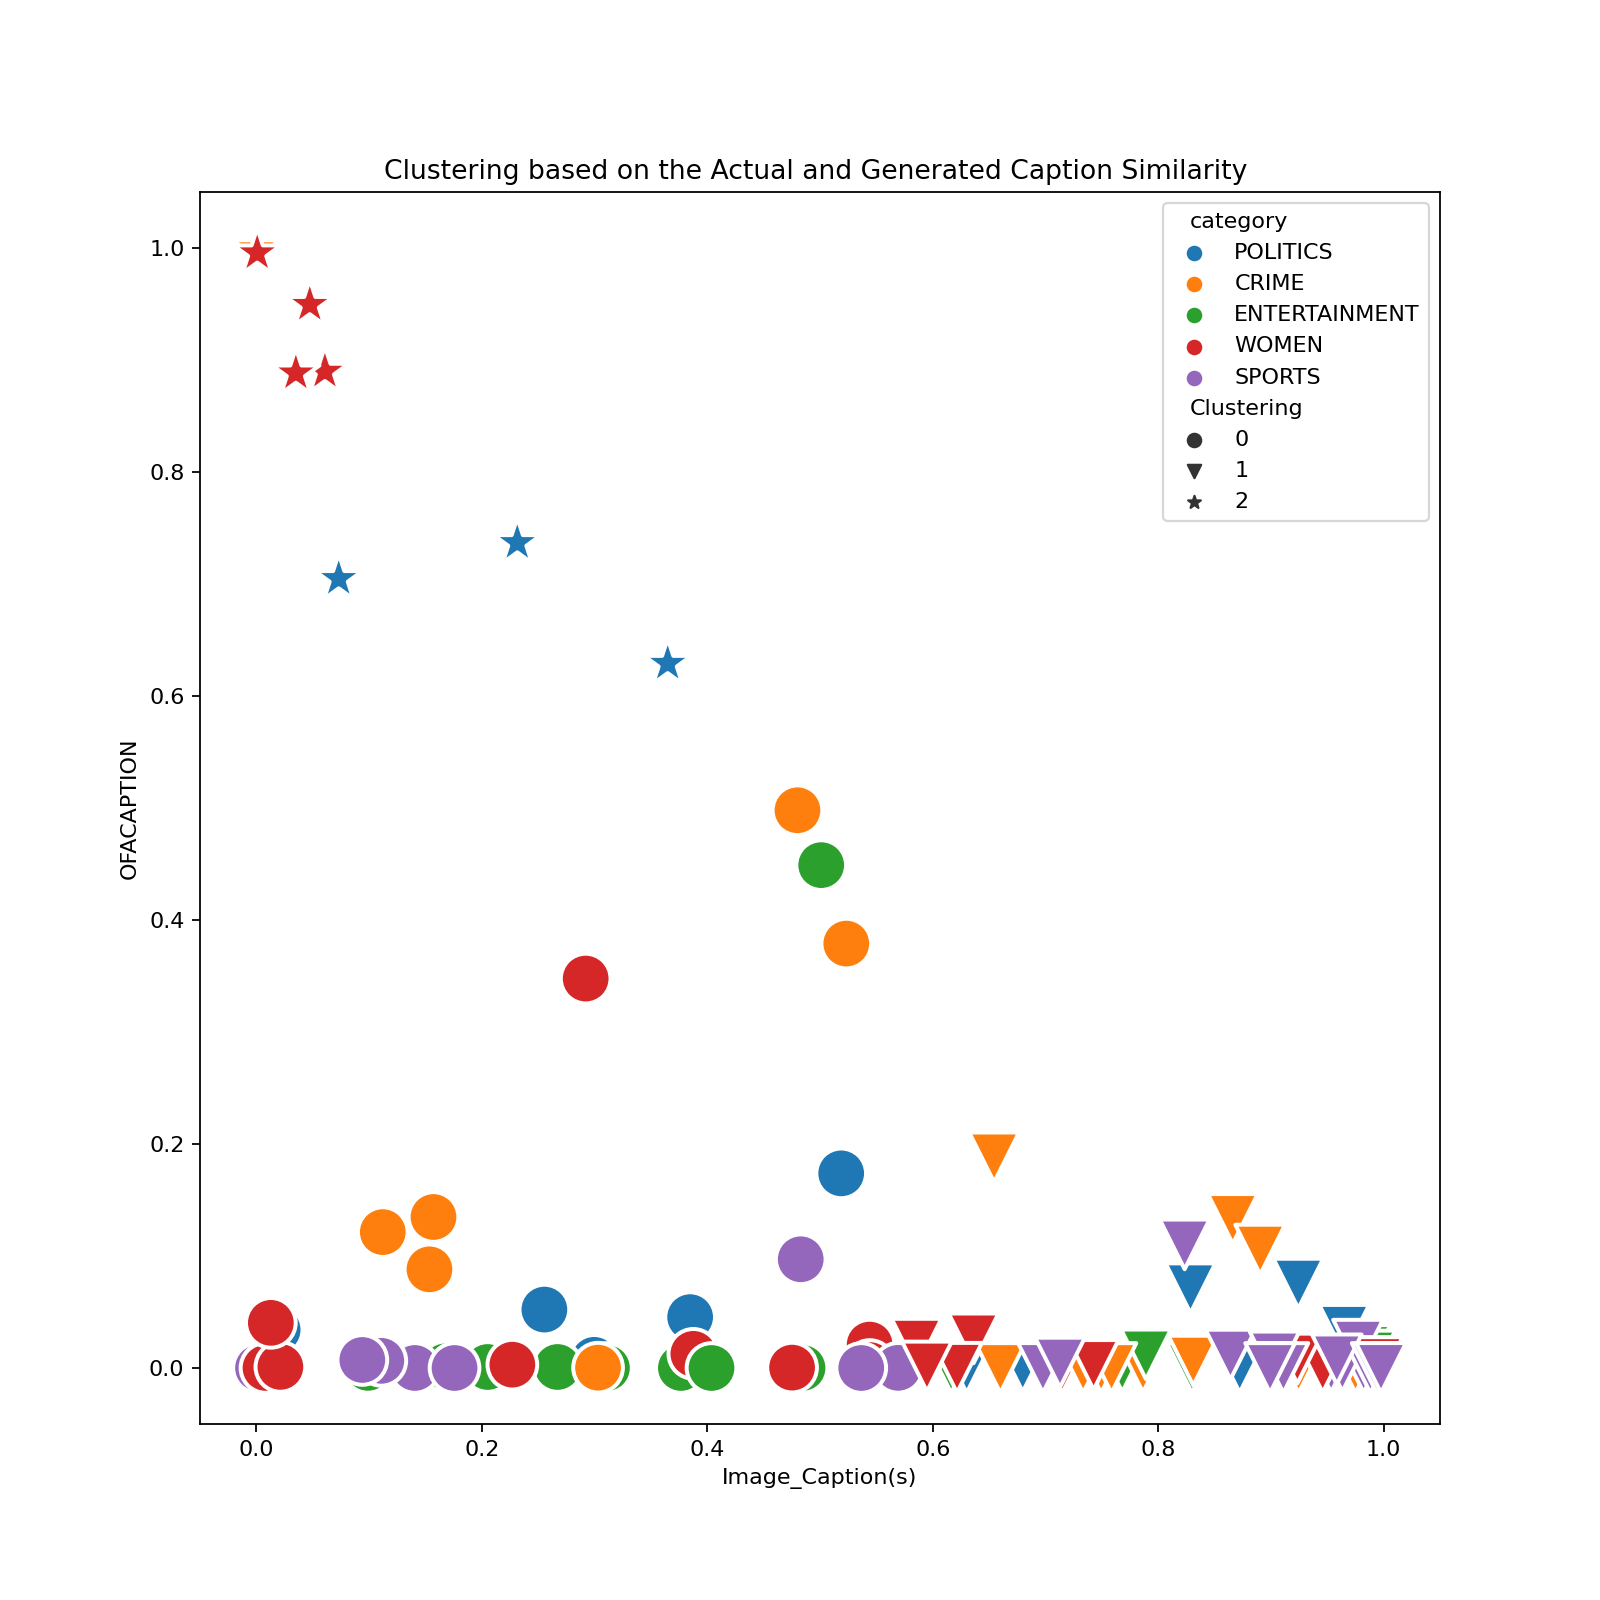

[Text(0.5, 1.0, 'Clustering based on the Actual and Generated Caption Similarity ')]

In [73]:
import seaborn as sns
# figure, ax = plt.subplots()
from matplotlib.pyplot import figure

from sklearn.preprocessing import MinMaxScaler 
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Image_Caption(s)','OFACAPTION']]) 
print(km.inertia_) 
df['Clustering'] = y_predicted

fig = figure(figsize=(10,10), dpi=80)
sns.scatterplot(data=df, x="Image_Caption(s)", y="OFACAPTION", style="Clustering", markers=['o', 'v', '*'], hue="category", s=500).set(title="Clustering based on the Actual and Generated Caption Similarity ")


#sse.append(km.inertia_) df['alloftheabove'] = y_predicted
# df1 = df[df['category']=='CRIME'] 
# df2 = df[df['category']=='ENTERTAINMENT'] 
# df3 = df[df['category']=='POLITICS'] 
# df4 = df[df['category']=='SPORTS'] 
# df5 = df[df['category']=='WOMEN']
# ax = plt.axes(projection='3d')

# ax.scatter3D(df1['Headline'], df1['Image_Caption(s)'], df1['OFACAPTION'], cmap='Red')
# ax.scatter3D(df2['Headline'], df2['Image_Caption(s)'], df2['OFACAPTION'], cmap='Green')
# ax.scatter3D(df3['Headline'], df3['Image_Caption(s)'], df3['OFACAPTION'], cmap='Blue')
# ax.scatter3D(df4['Headline'], df4['Image_Caption(s)'], df4['OFACAPTION'], cmap='Pink')
# ax.scatter3D(df5['Headline'], df5['Image_Caption(s)'], df5['OFACAPTION'], cmap='Purple')

# ax.set_xlabel('Headline CLIP score')
# ax.set_ylabel('Image Caption CLIP score')
# ax.set_zlabel('OFA caption CLIP score')
#plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
#plt.xlabel('gmean')
#plt.ylabel('mean')
# plt.show()

# ax.scatter(df1['Image_Caption(s)'], df1['OFACAPTION'], color='Red')
# ax.scatter(df2['Image_Caption(s)'], df2['OFACAPTION'], color='Green')
# ax.scatter(df3['Image_Caption(s)'], df3['OFACAPTION'], color='Blue')
# ax.scatter(df4['Image_Caption(s)'], df4['OFACAPTION'], color='Pink')
# ax.scatter(df5['Image_Caption(s)'], df5['OFACAPTION'], color='Purple')
# plt.show()
#this is for saving the image as a high resolution svg file. Again, nothing would have been possible
# without StackOverflow figure.savefig('C:/Users/ben/Desktop/images/svg/3dpicturesentropy.svg', format='svg', dpi=1200)

In [70]:
import seaborn as sns
# figure, ax = plt.subplots()
from matplotlib.pyplot import figure

from sklearn.preprocessing import MinMaxScaler 
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Headline','Short_descr', 'Image_Caption(s)','OFACAPTION']]) 
print(km.inertia_) 
df['Clustering'] = y_predicted

fig = figure(figsize=(10,10), dpi=80)
sns.scatterplot(data=df, x="Image_Caption(s)", y="OFACAPTION", style="Clustering", markers=['o', 'v', '*'], hue="category", s=500).set(title="Clustering based on the Actual, Generated Caption, Headline, Short Descr Similarity ")


#sse.append(km.inertia_) df['alloftheabove'] = y_predicted
# df1 = df[df['category']=='CRIME'] 
# df2 = df[df['category']=='ENTERTAINMENT'] 
# df3 = df[df['category']=='POLITICS'] 
# df4 = df[df['category']=='SPORTS'] 
# df5 = df[df['category']=='WOMEN']
# ax = plt.axes(projection='3d')

# ax.scatter3D(df1['Headline'], df1['Image_Caption(s)'], df1['OFACAPTION'], cmap='Red')
# ax.scatter3D(df2['Headline'], df2['Image_Caption(s)'], df2['OFACAPTION'], cmap='Green')
# ax.scatter3D(df3['Headline'], df3['Image_Caption(s)'], df3['OFACAPTION'], cmap='Blue')
# ax.scatter3D(df4['Headline'], df4['Image_Caption(s)'], df4['OFACAPTION'], cmap='Pink')
# ax.scatter3D(df5['Headline'], df5['Image_Caption(s)'], df5['OFACAPTION'], cmap='Purple')

# ax.set_xlabel('Headline CLIP score')
# ax.set_ylabel('Image Caption CLIP score')
# ax.set_zlabel('OFA caption CLIP score')
#plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
#plt.xlabel('gmean')
#plt.ylabel('mean')
# plt.show()

# ax.scatter(df1['Image_Caption(s)'], df1['OFACAPTION'], color='Red')
# ax.scatter(df2['Image_Caption(s)'], df2['OFACAPTION'], color='Green')
# ax.scatter(df3['Image_Caption(s)'], df3['OFACAPTION'], color='Blue')
# ax.scatter(df4['Image_Caption(s)'], df4['OFACAPTION'], color='Pink')
# ax.scatter(df5['Image_Caption(s)'], df5['OFACAPTION'], color='Purple')
# plt.show()
#this is for saving the image as a high resolution svg file. Again, nothing would have been possible
# without StackOverflow figure.savefig('C:/Users/ben/Desktop/images/svg/3dpicturesentropy.svg', format='svg', dpi=1200)

0      POLITICS
1      POLITICS
2         CRIME
3      POLITICS
4         CRIME
         ...   
119      SPORTS
120      SPORTS
121      SPORTS
122      SPORTS
123      SPORTS
Name: category, Length: 124, dtype: object